## Import necessary libraries, load and explore dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Read the CSV file into a DataFrame
data = pd.read_csv('C:\\Users\\HP\\Jupyter Deep learning\\archive\\ABBV.csv')

In [3]:
# display the first few rows
data.head()

,ticker,date,open,high,low,close
0,ABBV,2013-01-02,34.92,35.40,34.10,35.12
1,ABBV,2013-01-03,35.00,35.00,34.16,34.83
2,ABBV,2013-01-04,34.62,34.89,34.25,34.39
3,ABBV,2013-01-07,34.15,35.45,34.15,34.46
4,ABBV,2013-01-08,34.29,34.64,33.36,33.71


In [4]:
# get information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2647 entries, 0 to 2646
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  2647 non-null   object 
 1   date    2647 non-null   object 
 2   open    2647 non-null   float64
 3   high    2647 non-null   float64
 4   low     2647 non-null   float64
 5   close   2647 non-null   float64
dtypes: float64(4), object(2)
memory usage: 124.2+ KB


In [5]:
# check for missing values
data.isnull().sum()

ticker    0
date      0
open      0
high      0
low       0
close     0
dtype: int64

## Data Preprocessing

In [6]:
# select the relevant features.
data = data[['ticker', 'date', 'open', 'high', 'low', 'close']]

# check for missing values
data.isnull().sum()

ticker    0
date      0
open      0
high      0
low       0
close     0
dtype: int64

In [7]:
# convert the 'date' column to a datetime format
data['date'] = pd.to_datetime(data['date'])

# set the 'date' column as the index
data.set_index('date', inplace=True)

## Spliting Data into training and testing sets.

In [8]:
# separate the features (x) and target variable (y)
x = data[['open', 'high', 'low', 'close']]
y = data['close']

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Training the Machine Learning Model.

In [9]:
# initialize the linear regression model
model = LinearRegression()

# train the model on the training data
model.fit(x_train, y_train)

LinearRegression()

## Model Evaluation

In [10]:
# make prediction on the testing data
y_pred = model.predict(x_test)

# calculate the mean squared error(mse)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 2.0127969253073566e-14


## Data Visualization

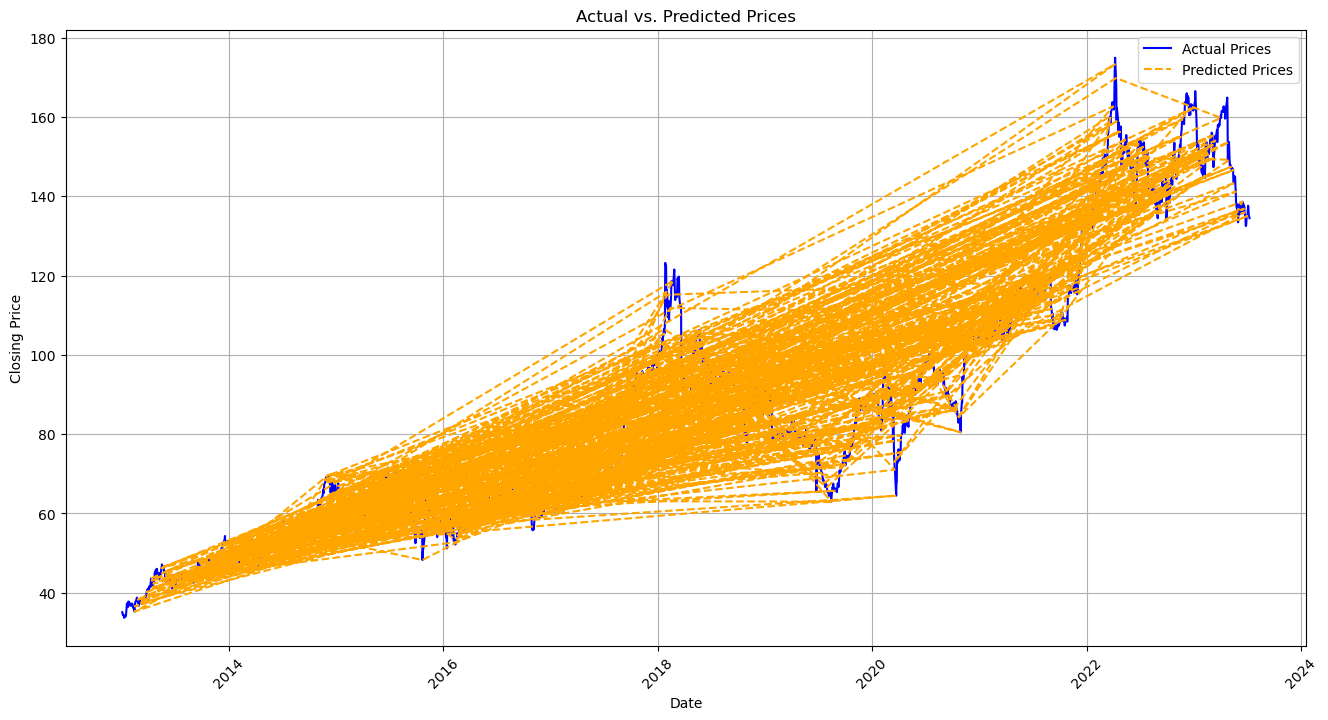

In [14]:
# plot the actual prices and predicted prices

plt.figure(figsize=(16, 8))
plt.plot(data.index, data['close'], label='Actual Prices', linestyle='-', color='blue')
plt.plot(x_test.index, y_pred, label='Predicted Prices', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()